In [70]:
import numpy as np 
import pandas as pd 
from matplotlib import pyplot as plt 

In [71]:
%matplotlib inline
df = pd.read_csv('data_assignment.csv')

# Which city has the most jobs? How many jobs each type (casual, fulltime, etc.) are there in each city?

In [75]:
city_most_jobs = df['Location'].value_counts()
city_most_jobs


Sydney                                  46357
Melbourne                               35315
Brisbane                                16538
Perth                                    9913
Adelaide                                 4998
ACT                                      4816
Newcastle, Maitland & Hunter             3099
Gold Coast                               2758
South West Coast VIC                     1383
Mackay & Coalfields                      1316
Wollongong, Illawarra & South Coast      1302
Port Hedland, Karratha & Pilbara         1210
Sunshine Coast                           1188
Cairns & Far North                       1177
Northern QLD                             1105
Gosford & Central Coast                  1066
Toowoomba & Darling Downs                 986
Darwin                                    974
Hobart                                    756
Blue Mountains & Central West             716
Kalgoorlie, Goldfields & Esperance        650
Lismore & Far North Coast         

In [77]:
city_by_job_type = df.groupby(['Location', 'JobType']).size()
city_by_job_type


Location                             JobType        
ACT                                  Casual/Vacation     300
                                     Contract/Temp      1707
                                     Full Time          2438
                                     Part Time           208
Adelaide                             Casual/Vacation     619
                                     Contract/Temp       822
                                     Full Time          3066
                                     Part Time           393
Adelaide Hills & Barossa             Casual/Vacation      35
                                     Contract/Temp        18
                                     Full Time            72
                                     Part Time            21
Albany & Great Southern              Casual/Vacation      11
                                     Contract/Temp        14
                                     Full Time            60
                                

In [82]:
locations = df['Location'].unique()
top_5 = ''
for location in locations:
    location_frame = df[(df['Location'] == location)]
    top_5 = location_frame['Classification'].value_counts().nlargest(5)
    print(location,'\n',top_5)  

Sydney 
 Information & Communication Technology    6999
Trades & Services                         3181
Accounting                                3105
Hospitality & Tourism                     3081
Manufacturing, Transport & Logistics      2536
Name: Classification, dtype: int64
Richmond & Hawkesbury 
 Manufacturing, Transport & Logistics    22
Trades & Services                       18
Hospitality & Tourism                    8
Sales                                    7
Healthcare & Medical                     7
Name: Classification, dtype: int64
Brisbane 
 Information & Communication Technology    2041
Trades & Services                         1627
Healthcare & Medical                      1341
Manufacturing, Transport & Logistics      1338
Hospitality & Tourism                     1032
Name: Classification, dtype: int64
Gosford & Central Coast 
 Healthcare & Medical                      168
Trades & Services                         156
Hospitality & Tourism                     136
Ma

Hobart 
 Healthcare & Medical               105
Hospitality & Tourism               72
Trades & Services                   71
Government & Defence                62
Administration & Office Support     45
Name: Classification, dtype: int64
Geraldton, Gascoyne & Midwest 
 Mining, Resources & Energy    72
Healthcare & Medical          38
Trades & Services             20
Hospitality & Tourism         16
Construction                  16
Name: Classification, dtype: int64
Katherine & Northern Australia 
 Healthcare & Medical                    23
Trades & Services                       16
Government & Defence                    16
Community Services & Development        13
Manufacturing, Transport & Logistics    10
Name: Classification, dtype: int64
Adelaide Hills & Barossa 
 Healthcare & Medical                    21
Manufacturing, Transport & Logistics    21
Hospitality & Tourism                   20
Trades & Services                       16
Education & Training                    14
Name

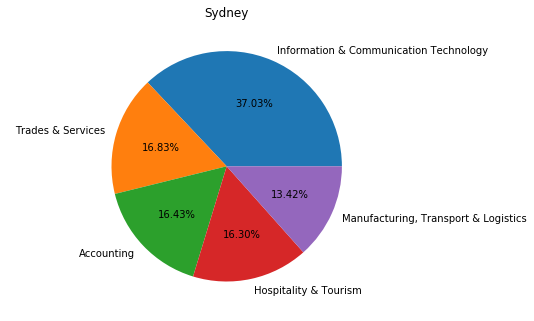

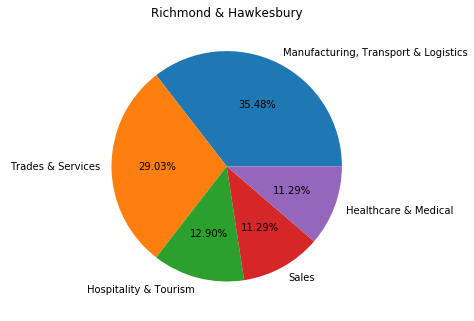

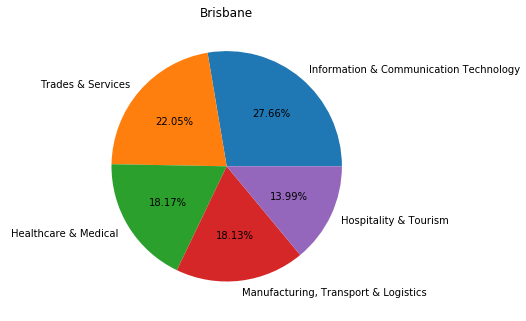

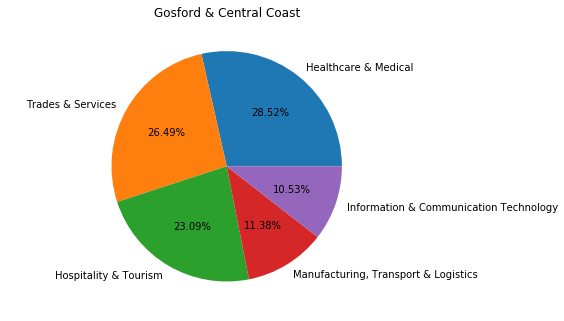

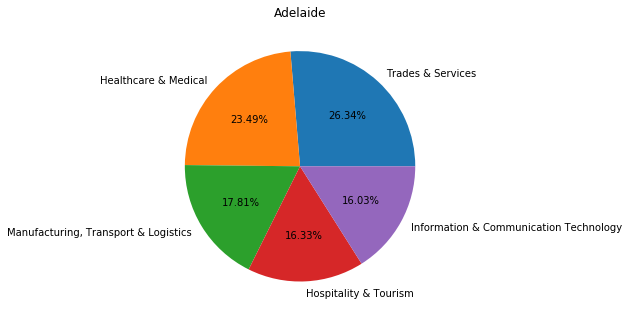

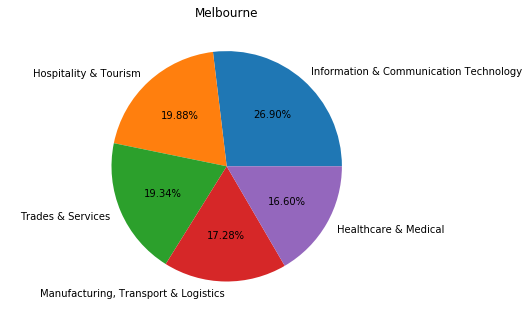

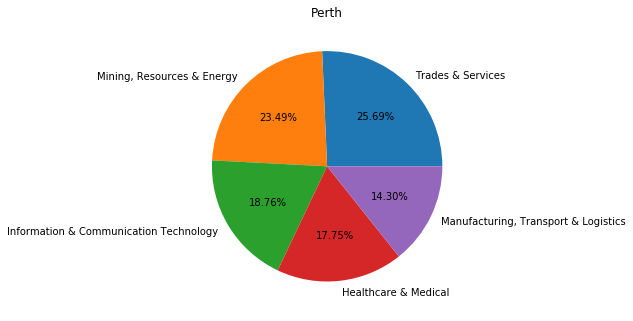

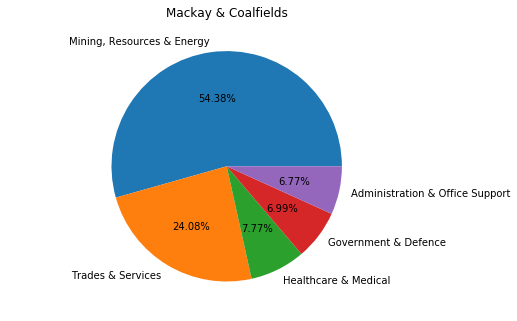

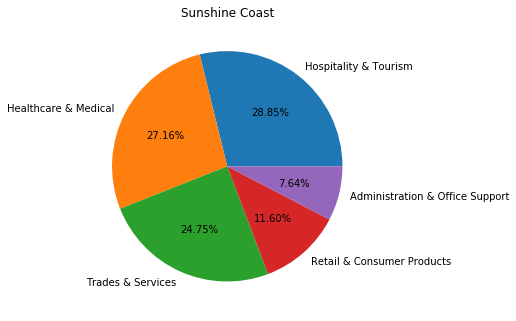

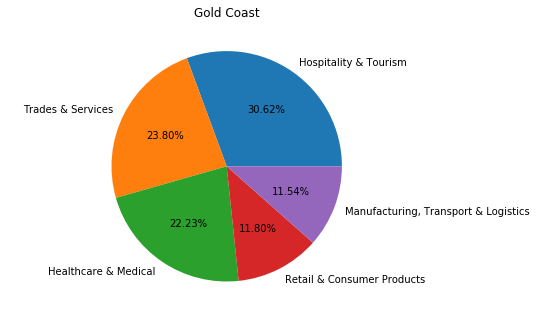

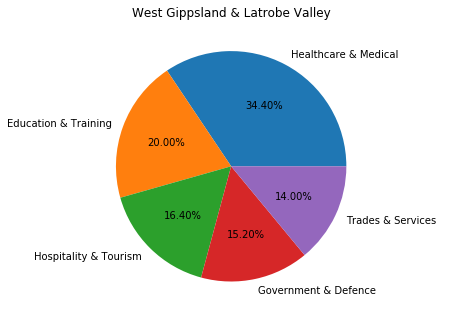

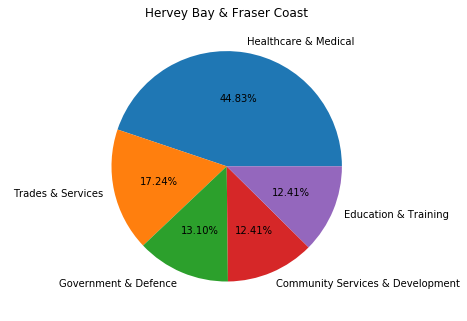

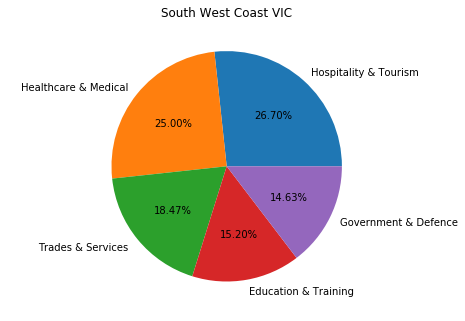

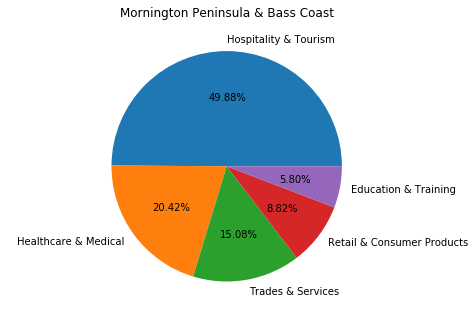

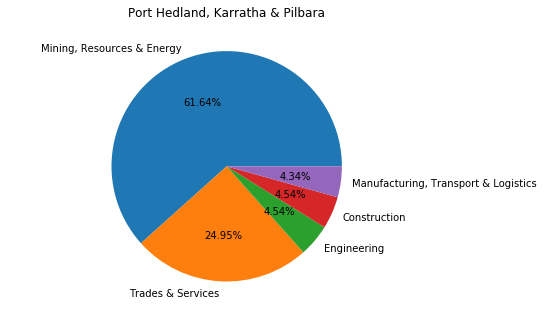

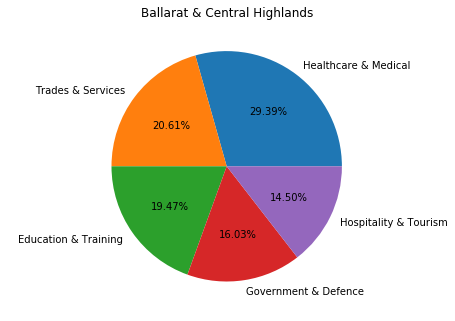

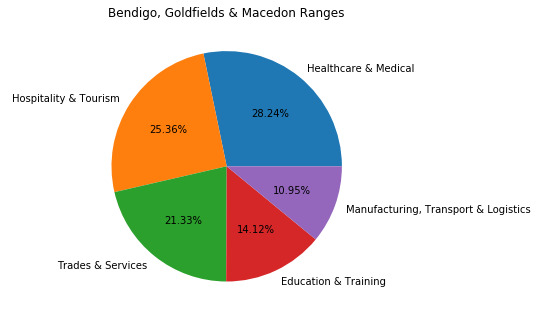

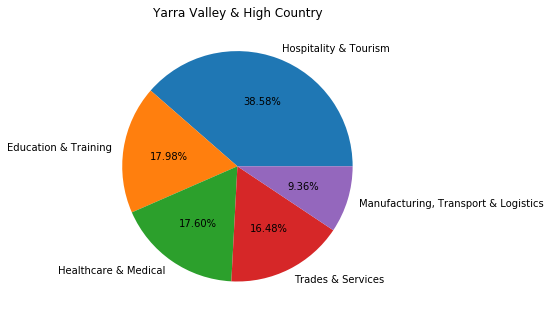

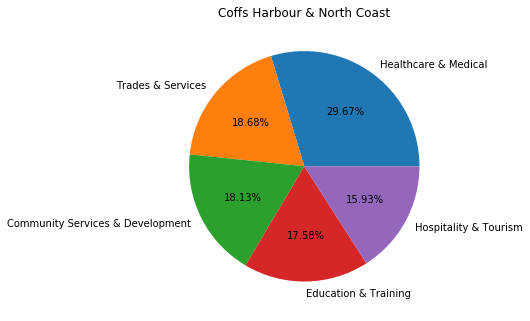

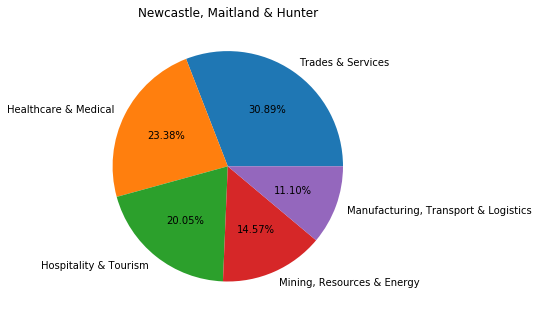

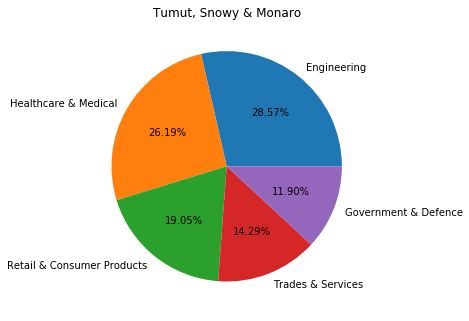

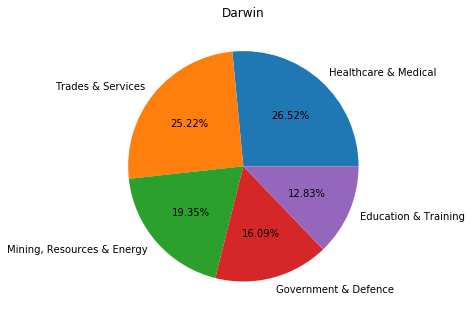

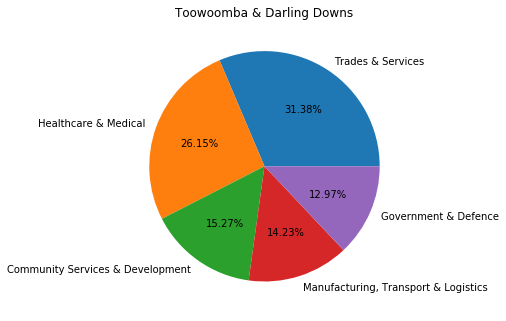

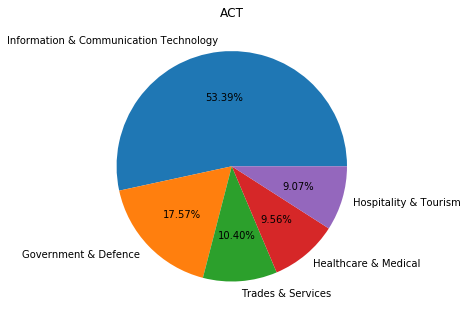

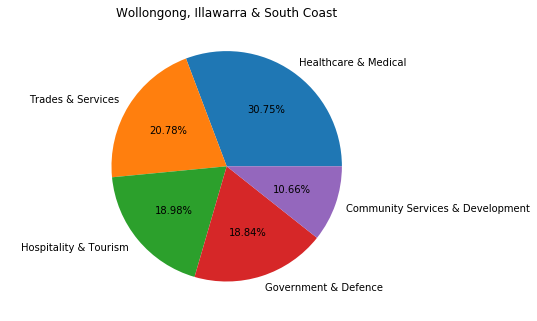

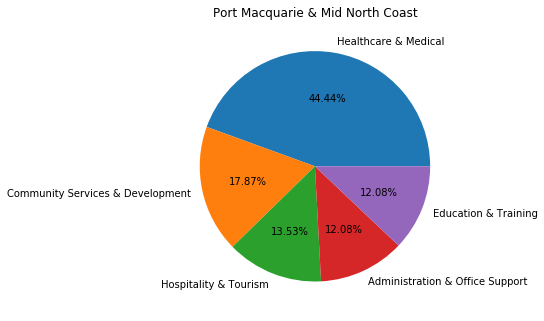

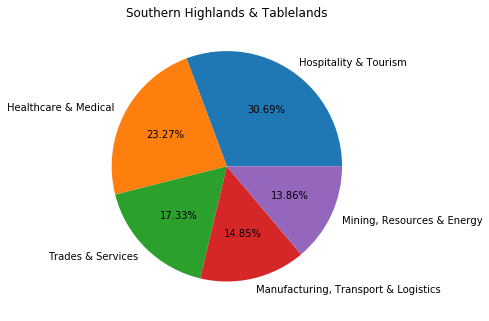

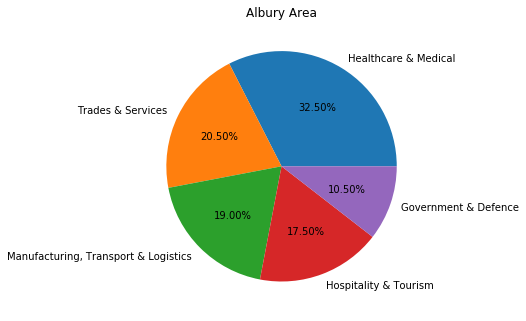

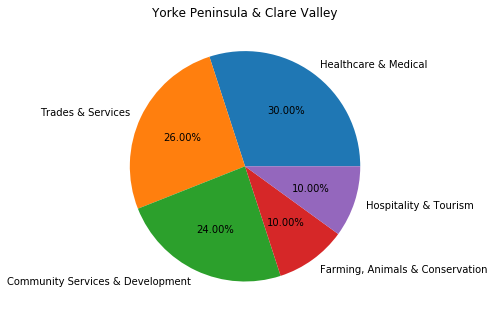

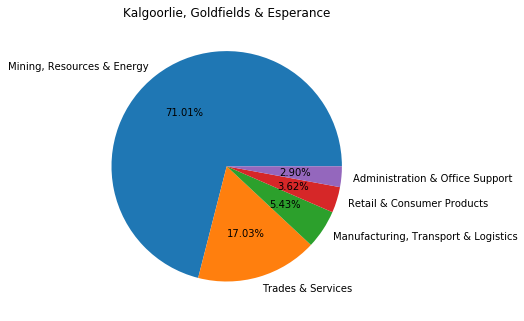

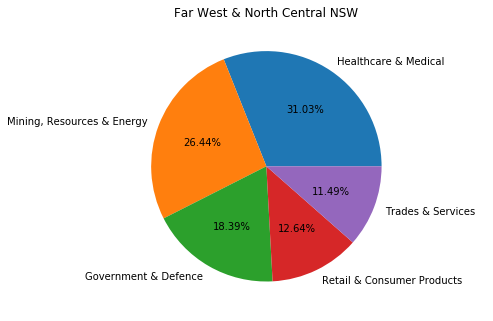

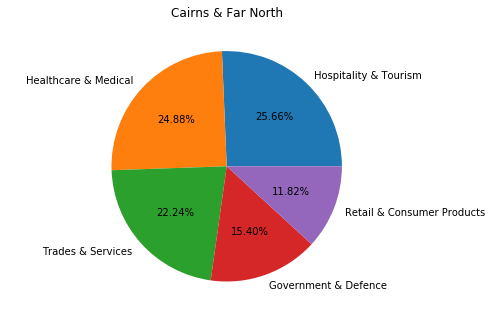

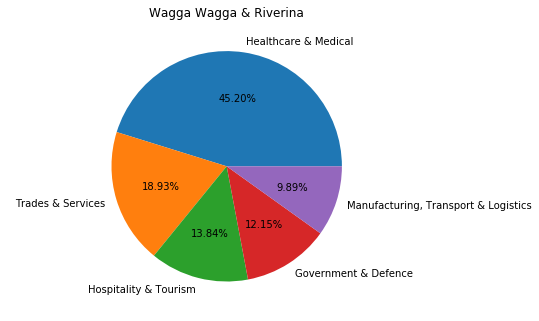

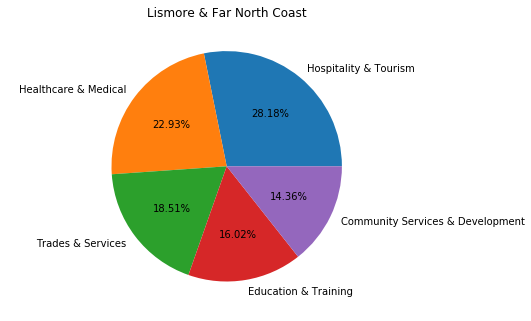

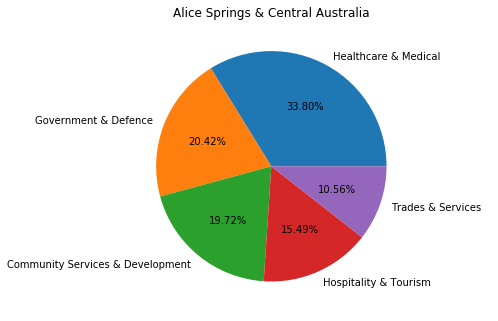

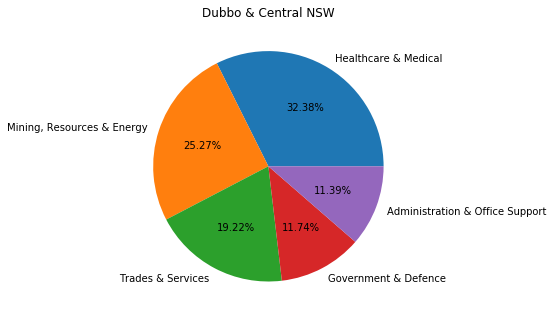

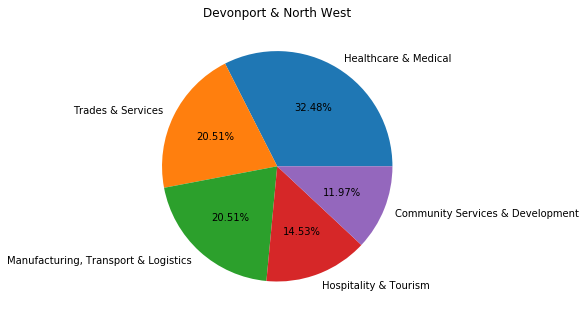

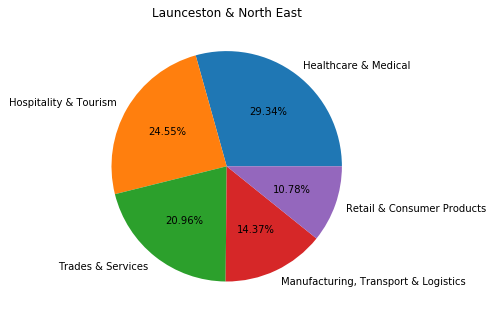

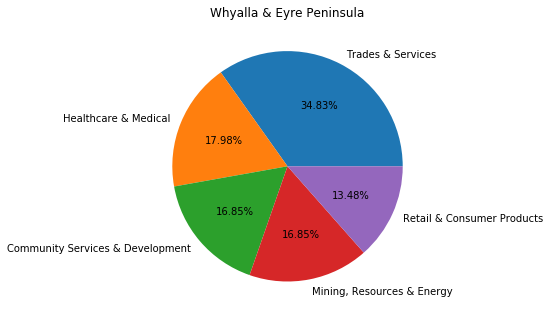

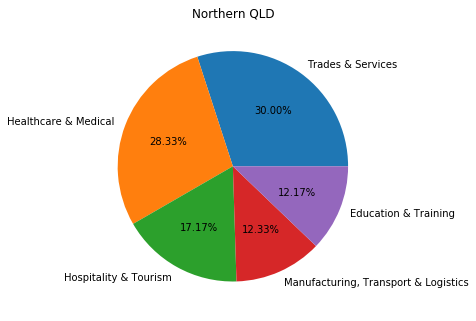

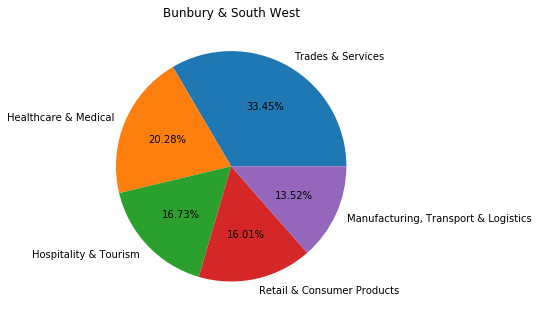

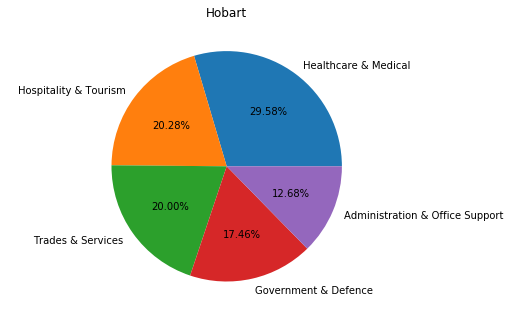

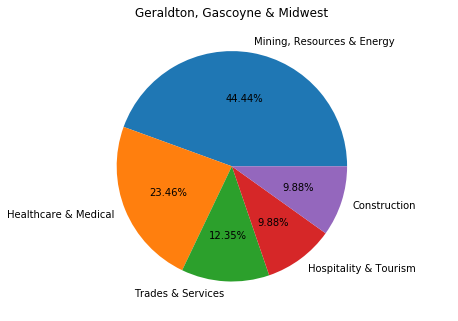

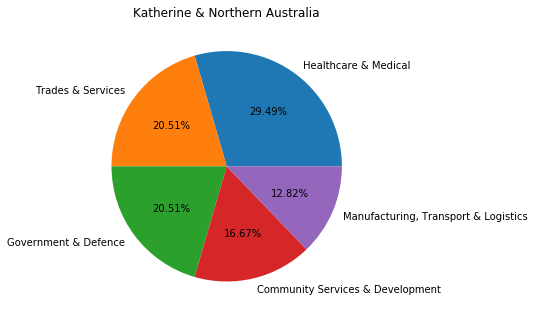

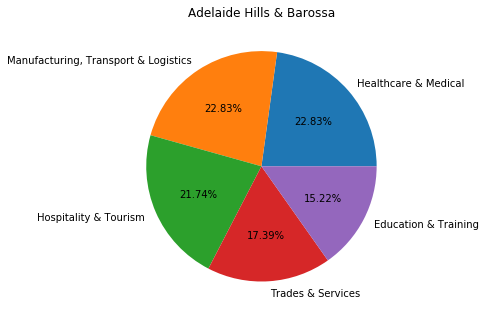

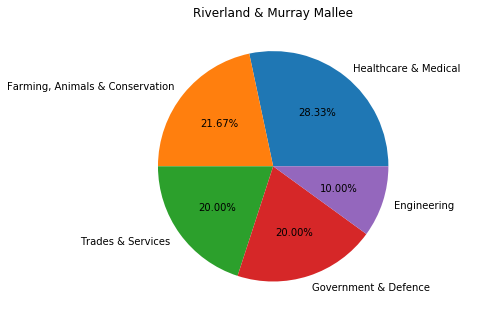

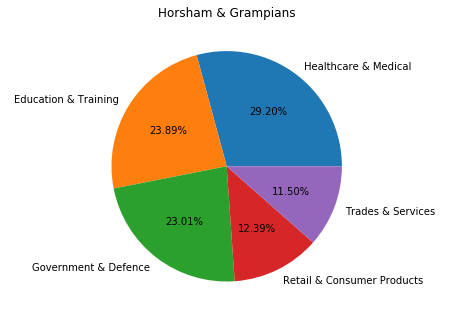

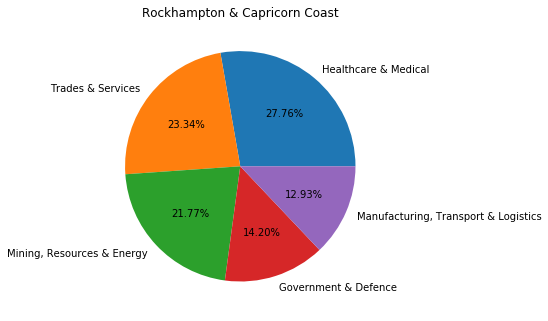

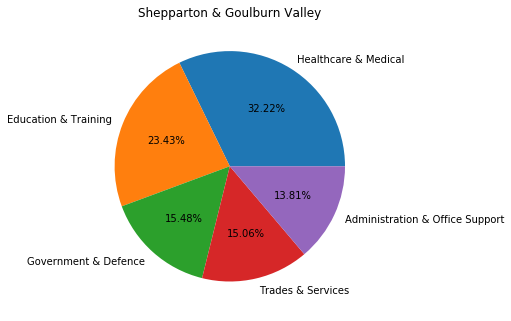

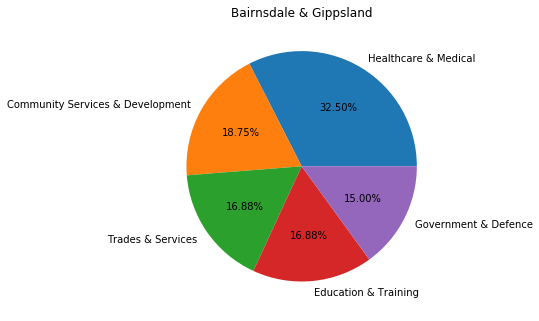

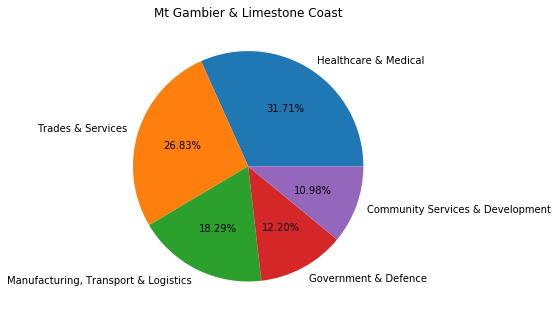

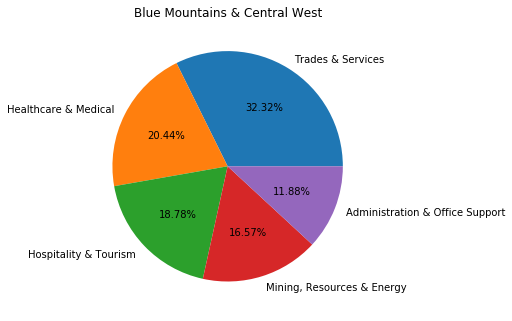

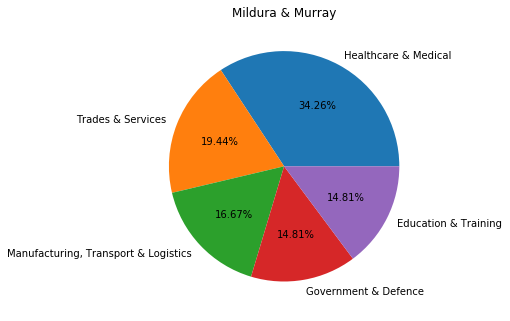

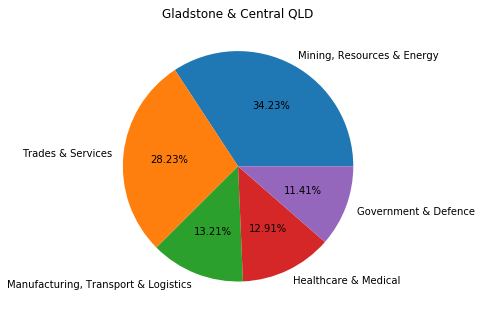

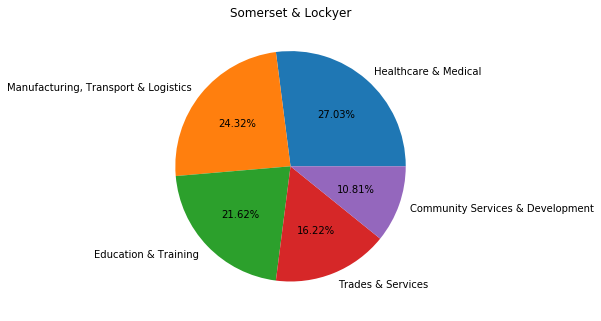

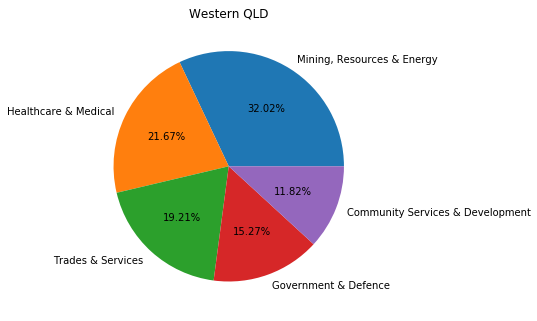

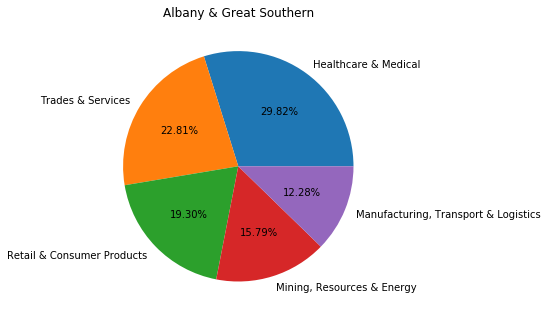

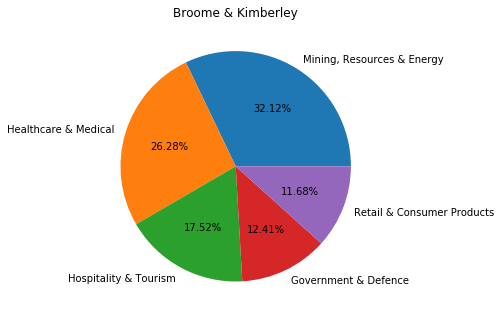

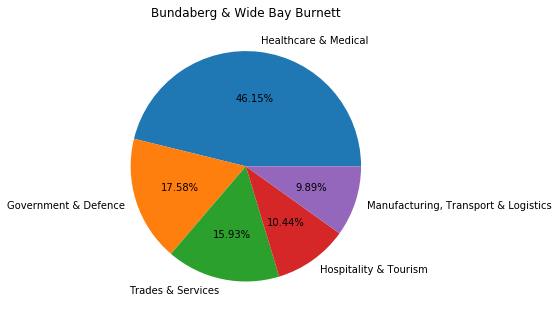

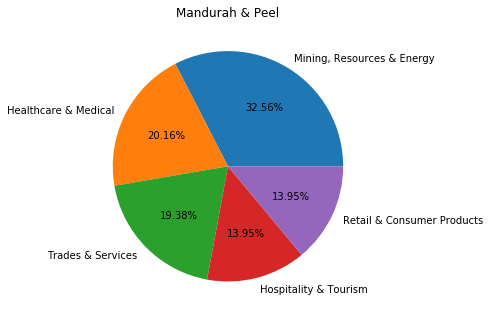

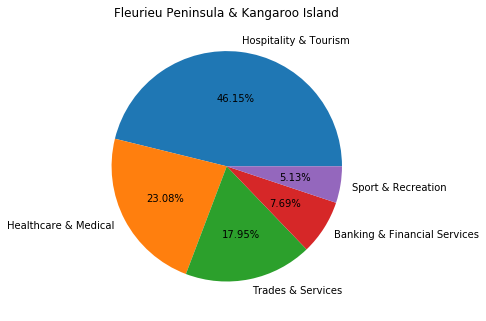

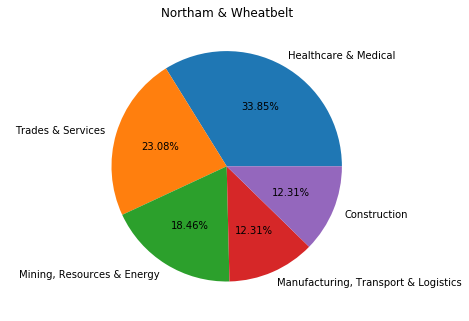

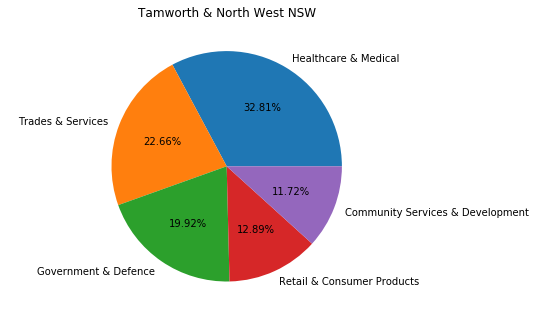

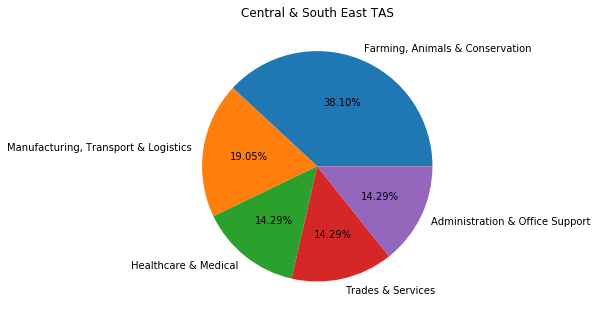

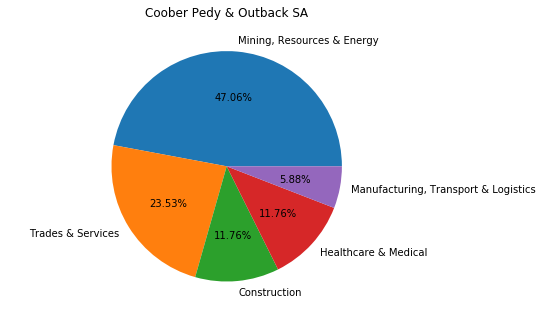

In [83]:
for location in locations:
    top_5_classification = df[(df['Location'] == location)]['Classification'].value_counts().nlargest(5)

    labels = top_5_classification.index.tolist()
    
    fig = plt.figure()
    ax = fig.add_axes([1, 1, 1, 1])
    ax.axis('equal')
    languages = labels
    ax.pie(top_5_classification, labels=languages, autopct='%1.2f%%')
    plt.title(location)
    plt.show()


In [59]:
# Which city is more well-paid?
# Which City is most well paid??????????????????
# Which City is paid the most on average??

city_by_salary_range = df.groupby(['Location', 'LowestSalary', 'HighestSalary']).size()
city_by_salary_range


Location                             LowestSalary  HighestSalary
ACT                                  0             30               769
                                     30            40               311
                                     40            50               379
                                     50            60               250
                                     60            70               311
                                     70            80               405
                                     80            100              389
                                     100           120              416
                                     120           150              382
                                     150           200              790
                                     200           250              414
Adelaide                             0             30               898
                                     30            40               458

In [84]:
for location in locations:
    location_df = df[(df['Location'] == location)]
    top_companies = location_df['Company'].value_counts().nlargest(5).index.tolist()
    print(location)
    for index, row in location_df.iterrows():
        if row['Company'] in top_companies:
            print(f"{row['Company']} | {row['Classification']}")
            top_companies.remove(row['Company'])
    print('\n')


Sydney
Robert Walters | Information & Communication Technology
Jora Local | Hospitality & Tourism
Design & Build | Construction
Bluefin Resources Pty Limited | Information & Communication Technology
Paxus | Information & Communication Technology


Richmond & Hawkesbury
Jora Local | Hospitality & Tourism
WestRock | Manufacturing, Transport & Logistics
St John of God Health Care Inc | Healthcare & Medical
Kelly Services | Manufacturing, Transport & Logistics
Premier Staffing | Manufacturing, Transport & Logistics


Brisbane
Jora Local | Hospitality & Tourism
The University of Queensland | Education & Training
Hudson | Information & Communication Technology
Programmed Skilled Workforce | Manufacturing, Transport & Logistics
u&u. Recruitment Partners | Accounting


Gosford & Central Coast
ecareer employment services | Information & Communication Technology
Central Coast Local Health District | Healthcare & Medical
Jora Local | Trades & Services
Forsythes Recruitment | Manufacturing, Transp



Wagga Wagga & Riverina
Jora Local | Hospitality & Tourism
Murrumbidgee Local Health District | Healthcare & Medical
Wagga Wagga City Council | Government & Defence
Charles Sturt University | Information & Communication Technology
HealthShare NSW | Government & Defence


Lismore & Far North Coast
Jora Local | Hospitality & Tourism
Northern NSW Local Health District | Government & Defence
TAFE NSW - North Coast Institute | Education & Training
Defence Force Recruiting Northern Region | Government & Defence
Programmed Skilled Workforce | Manufacturing, Transport & Logistics


Alice Springs & Central Australia
Newmont Australia Limited | Mining, Resources & Energy
Sugarman Australia | Healthcare & Medical
Central Australian Aboriginal Congress | Community Services & Development
Employment Office | Accounting
Department of Health | Government & Defence


Dubbo & Central NSW
Beilby Consulting | Trades & Services
NSW Ambulance | Government & Defence
Justice Health and Forensic Mental Health

In [ ]:
brisbane_df = df[(df['Location'] == 'Brisbane')]
sydney_df = df[(df['Location'] == 'Sydney')]

In [ ]:
#2. Analyse by time. (7 points)

In [16]:
#Visualise the number of job posts by month. (1 point)

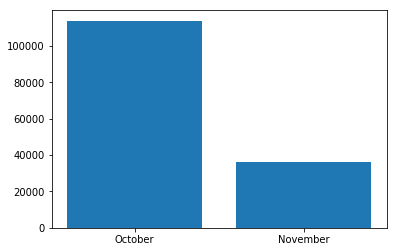

In [85]:
month_count = {}  

for index, col in df.iterrows(): 
    month = col['Date'].split('-')[1]
    
    if month in month_count:
        month_count[month] += 1
    else:
        month_count[month] = 1

months = ['October','November']
plt.bar(range(len(month_count)),month_count.values(),tick_label=months)
plt.show()

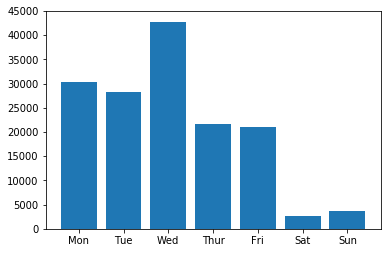

In [86]:
#Visualise the number of job posts by day of week
from datetime import datetime


def fix_date(date):
    return date[:10]

df['Date'] = df['Date'].apply(fix_date)


day_count = {}  

for index, col in df.iterrows(): 
    year = int(col['Date'].split('-')[0])
    month = int(col['Date'].split('-')[1])
    day = int(col['Date'].split('-')[2])
    
    week_day = datetime(year, month, day).strftime('%A')

    if week_day in day_count:
        day_count[week_day] += 1
    else:
        day_count[week_day] = 1
        


days = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
day_values = [day_count['Monday'],day_count['Tuesday'],day_count['Wednesday'],day_count['Thursday'],day_count['Friday'],day_count['Saturday'],day_count['Sunday']]

plt.bar(range(len(days)),day_values,tick_label=days)
plt.show()


<BarContainer object of 31 artists>

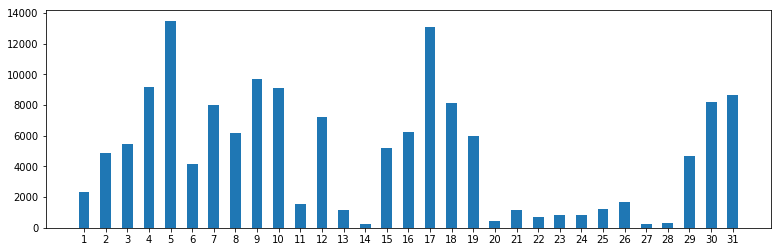

In [69]:
#Visualise the number of job posts by day of the month.
month_date = {}  

for index, col in df.iterrows(): 
    day = int(col['Date'].split('-')[2])
    
    if day in month_date:
        month_date[day] += 1
    else:
        month_date[day] = 1
        
sorted_month_date = dict(sorted(month_date.items()))
month_days = list(sorted_month_date.keys())


plt.figure(figsize=(13, 4))  
plt.bar(range(len(sorted_month_date)), sorted_month_date.values(),tick_label=month_days, width=0.5)

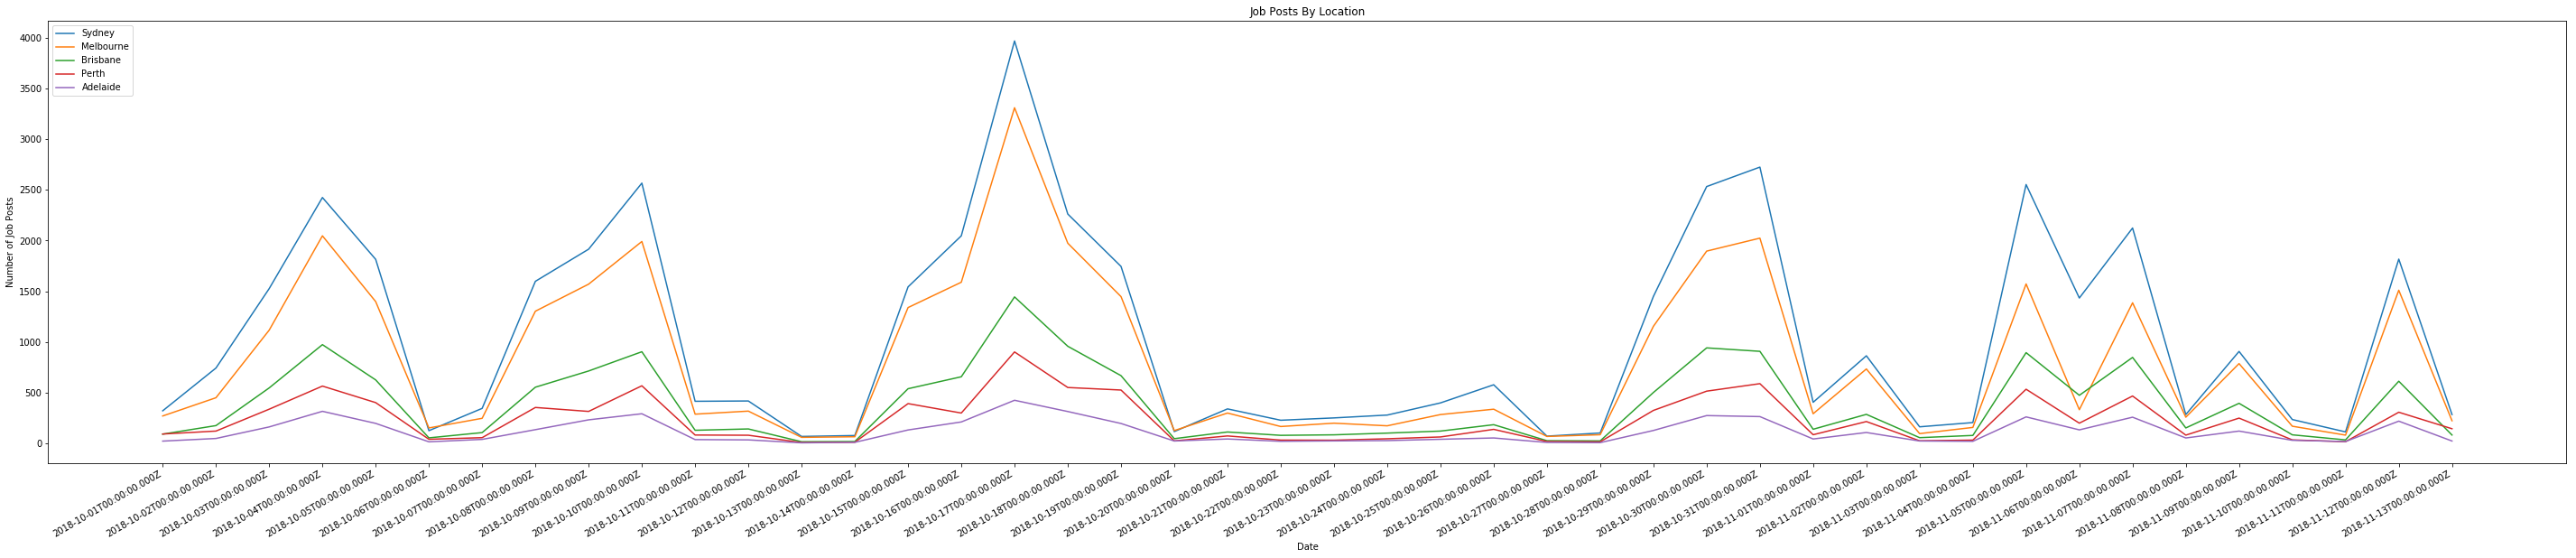

In [8]:
#Visualise trending of the job postings for the big cities.

dates = df['Date'].unique()
dates.sort()


sydney = df[(df['Location'] == 'Sydney')]
sydneyPostings = []

melbourne = df[(df['Location'] == 'Melbourne')]
melbournePostings = []

brisbane = df[(df['Location'] == 'Brisbane')]
brisbanePostings = []

perth = df[(df['Location'] == 'Perth')]
perthPostings = []

adelaide = df[(df['Location'] == 'Adelaide')]
adelaidePostings = []

for day in dates:
    sydneyPostings.append(len(sydney[(sydney['Date'] == day)]))
    melbournePostings.append(len(melbourne[(melbourne['Date'] == day)]))
    brisbanePostings.append(len(brisbane[(brisbane['Date'] == day)]))
    perthPostings.append(len(perth[(perth['Date'] == day)]))
    adelaidePostings.append(len(adelaide[(adelaide['Date'] == day)]))
    
    
    
plt.figure(figsize=(50, 10))  

plt.plot(dates, sydneyPostings,label="Sydney")
plt.plot(dates, melbournePostings,label="Melbourne")
plt.plot(dates, brisbanePostings,label="Brisbane")
plt.plot(dates, perthPostings,label="Perth")
plt.plot(dates, adelaidePostings,label="Adelaide")

plt.title('Job Posts By Location')
plt.xlabel('Date')
plt.ylabel('Number of Job Posts')
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()
#plt.savefig("sample.jpg", dpi=1200)

plt.show()


In [ ]:
#Based on the above charts, provide your observation about the number of job posts over time. Give your own conclusion. 

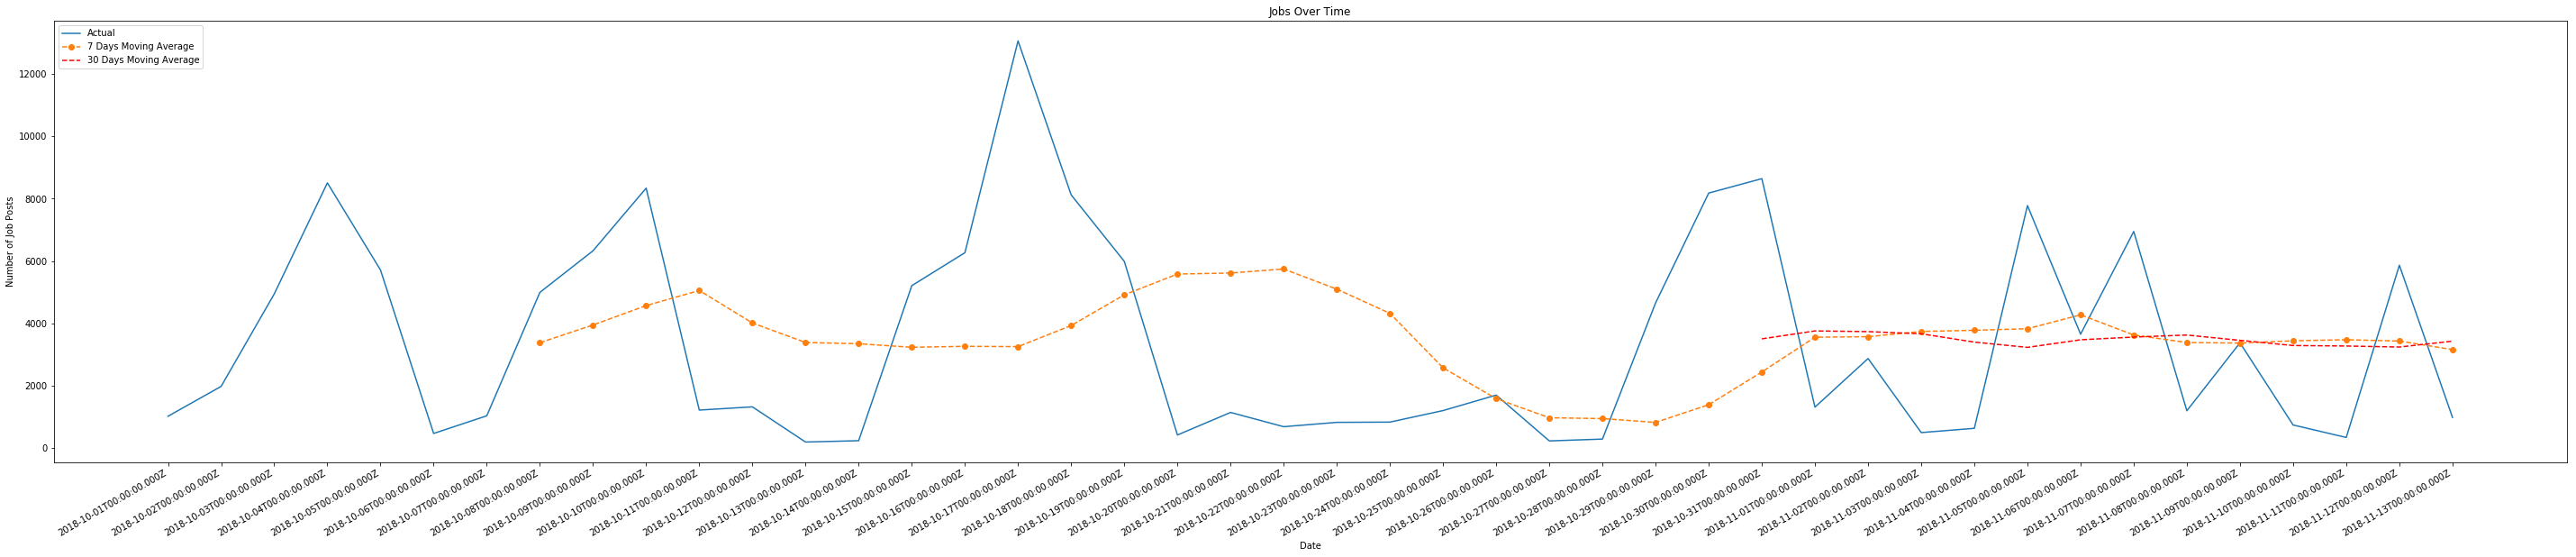

In [36]:
# Using moving average
def moving_average(actual_values, k, to_period):
    moving_average = [] 
    for m in range(0, to_period):
        if m < k:
            job_predict = None
        else:
            history = actual_values[m-k:m]
            job_predict = sum(history) / len(history) 
            
        moving_average.append(job_predict)
    
    return moving_average

dates = df['Date'].unique()
dates.sort()

totalPostings = [] 

for day in dates:
    totalPostings.append(len(df[(df['Date'] == day)]))


plt.figure(figsize=(50, 10))  

moving_average_7_days = moving_average(totalPostings,7,len(dates))
moving_average_30_days = moving_average(totalPostings,30,len(dates))


plt.plot(dates, totalPostings,label="Actual")
plt.plot(dates, moving_average_7_days,"o--",label="7 Days Moving Average")
plt.plot(dates, moving_average_30_days,"r--",label="30 Days Moving Average")

plt.title('Jobs Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Job Posts')
plt.legend(loc='upper left')
plt.gcf().autofmt_xdate()

In [4]:
#Section 2 – Discussion
#Scenario 1
#: Tom, a grade 12 student in Brisbane, has good results in all of the subjects in his
#school. He is finding a major in the University which can guarantee a job in his state
#(Queensland) with a good income (>=80K) in the future. Based on the current job market
#dataset, which major and the related subjects do you recommend him? Explain your choice

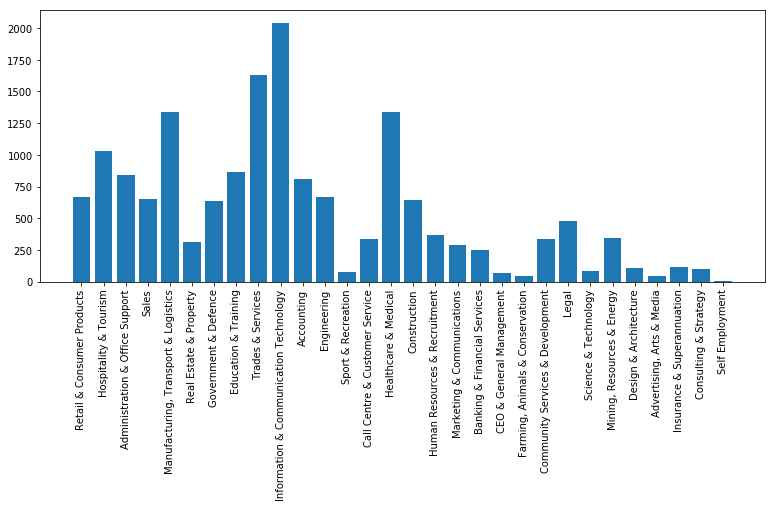

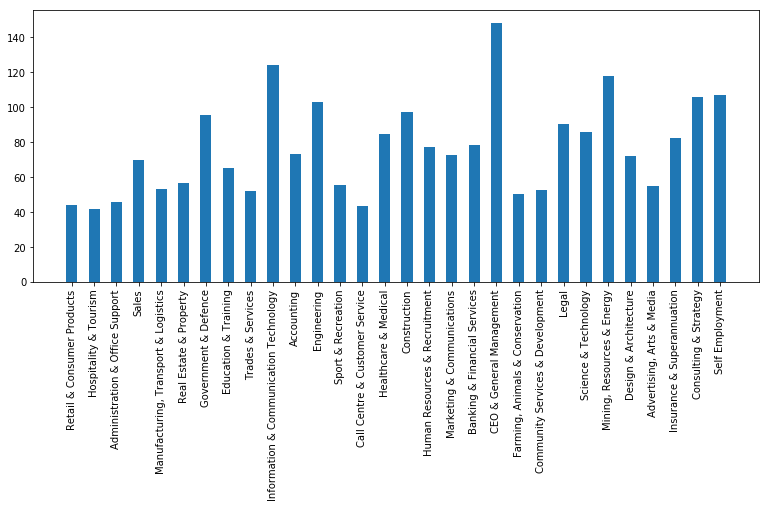

In [41]:
df['Average'] = df[['HighestSalary', 'LowestSalary']].mean(axis=1)



newDict = {}

for index, col in df.iterrows(): 
    if (col.Location  != 'Brisbane'):
        continue 
        
    if col.Classification in newDict:
        newDict[col.Classification].append(col.Average)
    else:
        newDict[col.Classification] = [col.Average]


showGraph = []
fields = []
average = []

for key, value in newDict.items():
    showGraph.append(len(value))
    fields.append(key)
    average.append(sum(value) / len(value))

plt.figure(figsize=(13, 5))  
plt.bar(range(len(fields)),showGraph,tick_label=fields,width=0.8)
plt.xticks(rotation='vertical')
plt.show()
    
    
plt.figure(figsize=(13, 5))  
plt.bar(range(len(fields)),average,tick_label=fields,width=0.5)
plt.xticks(rotation='vertical')
plt.show()
    
    


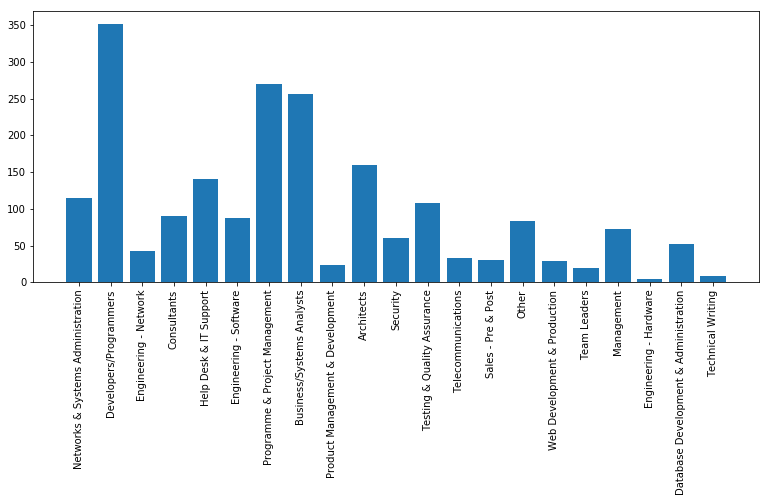

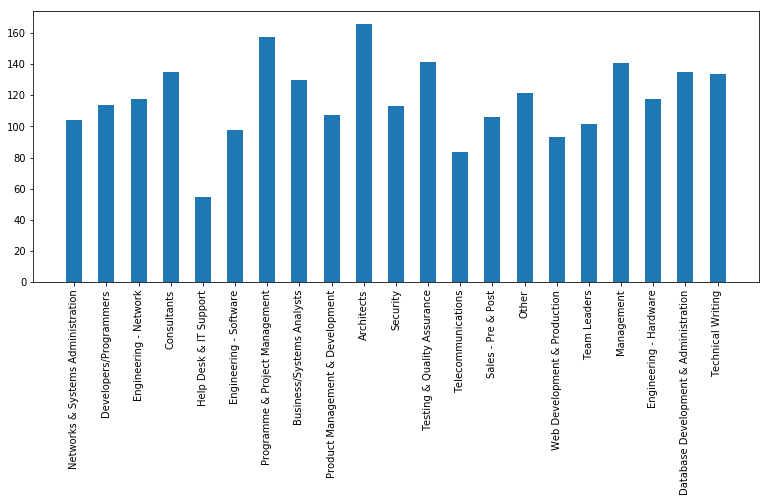

In [51]:
IT_frame = df[(df['Classification'] == 'Information & Communication Technology')]
IT_Brisbane = IT_frame[(IT_frame['Location'] == 'Brisbane')]



sub_classification = {}

for index, col in IT_Brisbane.iterrows(): 

    if col.SubClassification in sub_classification:
        sub_classification[col.SubClassification].append(col.Average)
    else:
        sub_classification[col.SubClassification] = [col.Average]


showGraph = []
fields = []
average = []

for key, value in sub_classification.items():
    showGraph.append(len(value))
    fields.append(key)
    average.append(sum(value) / len(value))

plt.figure(figsize=(13, 5))  
plt.bar(range(len(fields)),showGraph,tick_label=fields,width=0.8)
plt.xticks(rotation='vertical')
plt.show()
    
    
plt.figure(figsize=(13, 5))  
plt.bar(range(len(fields)),average,tick_label=fields,width=0.5)
plt.xticks(rotation='vertical')
plt.show()